In [ ]:
!pip install yfinance

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import os
from subprocess import check_output
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from pandas.plotting import lag_plot
from pandas import datetime
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")

import datetime

<ipython-input-2-fef68cc012c5>:11: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


In [ ]:
import yfinance as yf

In [ ]:
# Define the ticker symbol for Microsoft
ticker_symbol = "MSFT"

# Define the start and end dates for the data you want
start_date = "2018-01-01"
end_date = "2023-01-01"

# Use yfinance to download the data
data = yf.download(ticker_symbol, start=start_date, end=end_date)

[*********************100%%**********************]  1 of 1 completed


In [ ]:
round(data.head(), 3)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-01-02,86.13,86.31,85.50,85.95,80.229,22483800
2018-01-03,86.06,86.51,85.97,86.35,80.602,26061400
2018-01-04,86.59,87.66,86.57,87.11,81.312,21912000
2018-01-05,87.66,88.41,87.43,88.19,82.320,23407100
2018-01-08,88.20,88.58,87.60,88.28,82.404,22113000


In [ ]:
round(data.tail(), 3)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-12-23,236.11,238.87,233.94,238.73,236.632,21207000
2022-12-27,238.70,238.93,235.83,236.96,234.877,16688600
2022-12-28,236.89,239.72,234.17,234.53,232.469,17457100
2022-12-29,235.65,241.92,235.65,241.01,238.892,19770700
2022-12-30,238.21,239.96,236.66,239.82,237.712,21938500


EDA

In [ ]:
print(data.head())
print(data.tail())

                 Open       High        Low      Close  Adj Close    Volume
Date                                                                       
2018-01-02  86.129997  86.309998  85.500000  85.949997  80.229012  22483800
2018-01-03  86.059998  86.510002  85.970001  86.349998  80.602386  26061400
2018-01-04  86.589996  87.660004  86.570000  87.110001  81.311790  21912000
2018-01-05  87.660004  88.410004  87.430000  88.190002  82.319931  23407100
2018-01-08  88.199997  88.580002  87.599998  88.279999  82.403915  22113000
                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2022-12-23  236.110001  238.869995  233.940002  238.729996  236.631821   
2022-12-27  238.699997  238.929993  235.830002  236.960007  234.877380   
2022-12-28  236.889999  239.720001  234.169998  234.529999  232.468719   
2022-12-29  235.649994  241.919998  235.649994  241.009995  238.891754   
2022-12-30  238.210007  

In [ ]:
data.shape

(1259, 6)

Descriptive Statistics about the Data

In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Open,1259.0,1.938420e+02,7.460785e+01,8.606000e+01,1.194450e+02,2.004200e+02,2.561200e+02,3.446200e+02
High,1259.0,1.958781e+02,7.537703e+01,8.631000e+01,1.201250e+02,2.039500e+02,2.590100e+02,3.496700e+02
Low,1259.0,1.916792e+02,7.377020e+01,8.383000e+01,1.185500e+02,1.977400e+02,2.529250e+02,3.422000e+02
Close,1259.0,1.938734e+02,7.461230e+01,8.501000e+01,1.196000e+02,2.019100e+02,2.552450e+02,3.431100e+02
Adj Close,1259.0,1.884630e+02,7.487141e+01,7.935159e+01,1.140807e+02,1.956430e+02,2.508979e+02,3.369372e+02
Volume,1259.0,3.021664e+07,1.287277e+07,8.989200e+06,2.216800e+07,2.700060e+07,3.434100e+07,1.112421e+08


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1259 entries, 2018-01-02 to 2022-12-30
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1259 non-null   float64
 1   High       1259 non-null   float64
 2   Low        1259 non-null   float64
 3   Close      1259 non-null   float64
 4   Adj Close  1259 non-null   float64
 5   Volume     1259 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 68.9 KB


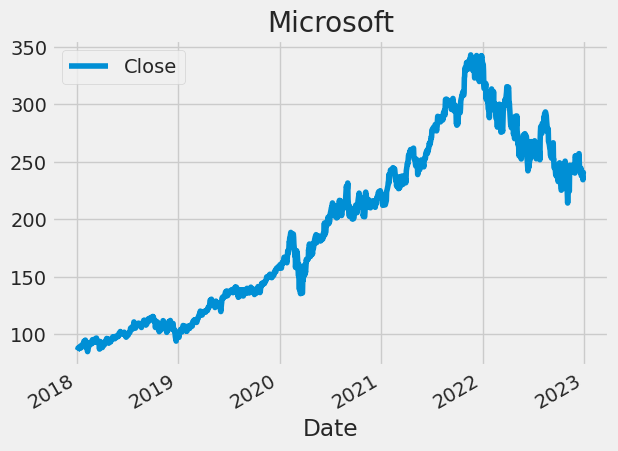

In [ ]:
data[['Close']].plot()
plt.title("Microsoft")
plt.show()

Text(0.5, 0, 'Year')

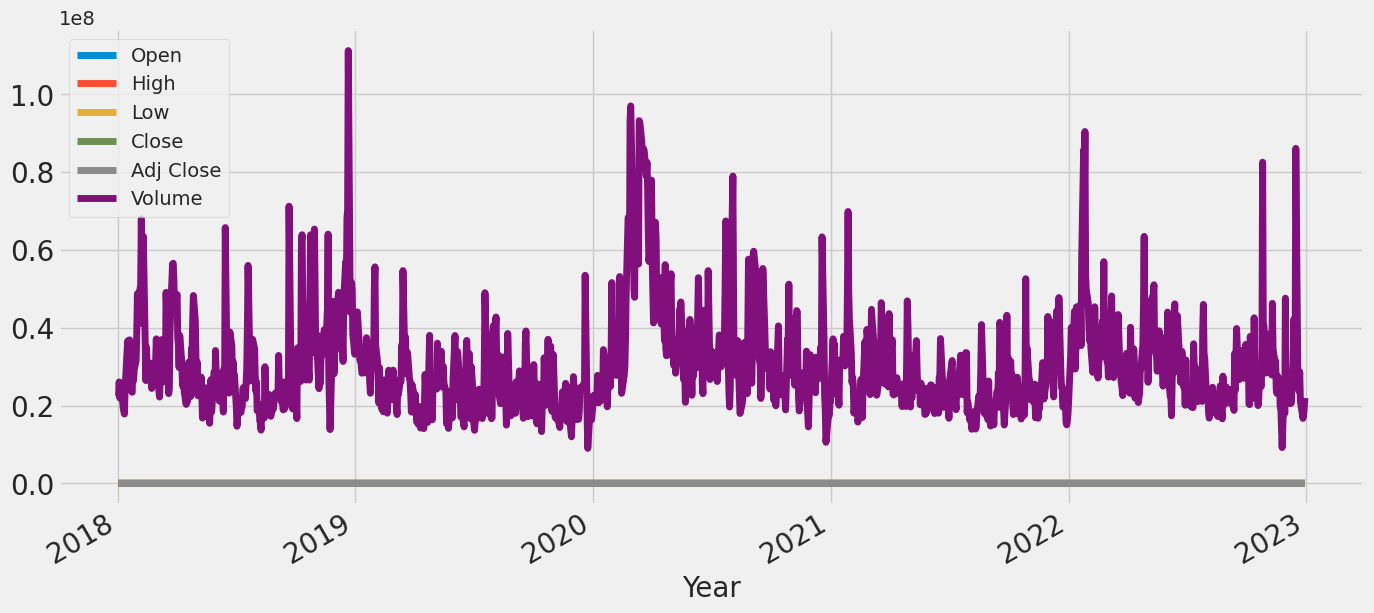

In [ ]:
data.plot(figsize=(15,7), linewidth=5, fontsize=20)
plt.xlabel('Year', fontsize=20)

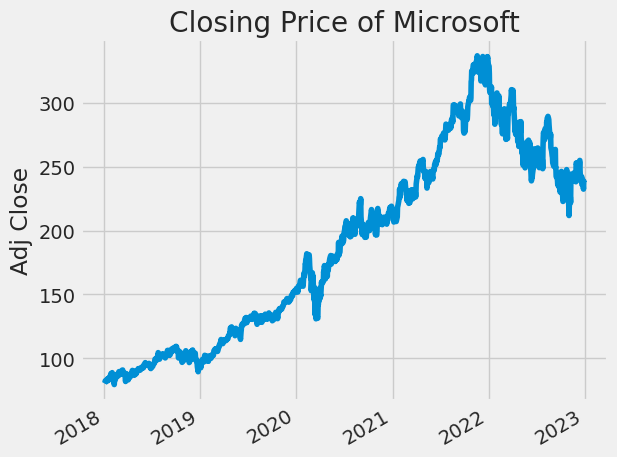

In [ ]:
data['Adj Close'].plot()
plt.ylabel('Adj Close')
plt.xlabel(None)
plt.title(f"Closing Price of Microsoft")

plt.tight_layout()

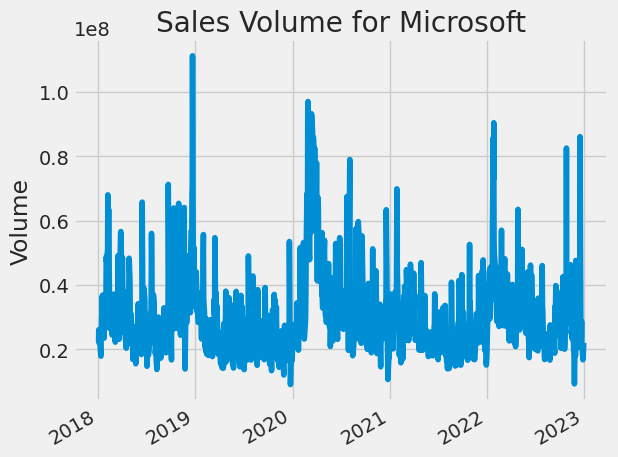

In [ ]:
data['Volume'].plot()
plt.ylabel('Volume')
plt.xlabel(None)
plt.title(f"Sales Volume for Microsoft")

plt.tight_layout()

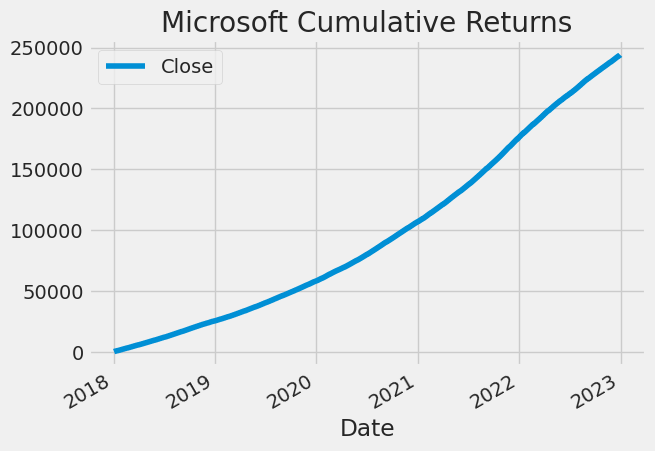

In [ ]:
# TRend
dr = data['Close'].cumsum()
dr.plot()
plt.title('Microsoft Cumulative Returns')
plt.legend()

Text(0.5, 1.0, 'Microsoft Autocorrelation plot')

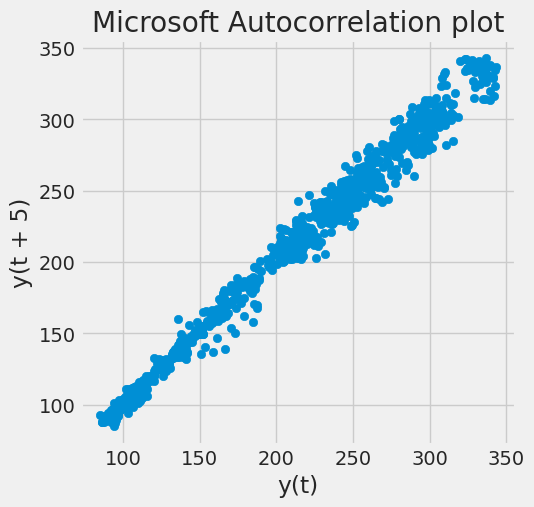

In [ ]:
plt.figure(figsize=(5,5))
lag_plot(data['Close'], lag=5)
plt.title('Microsoft Autocorrelation plot')

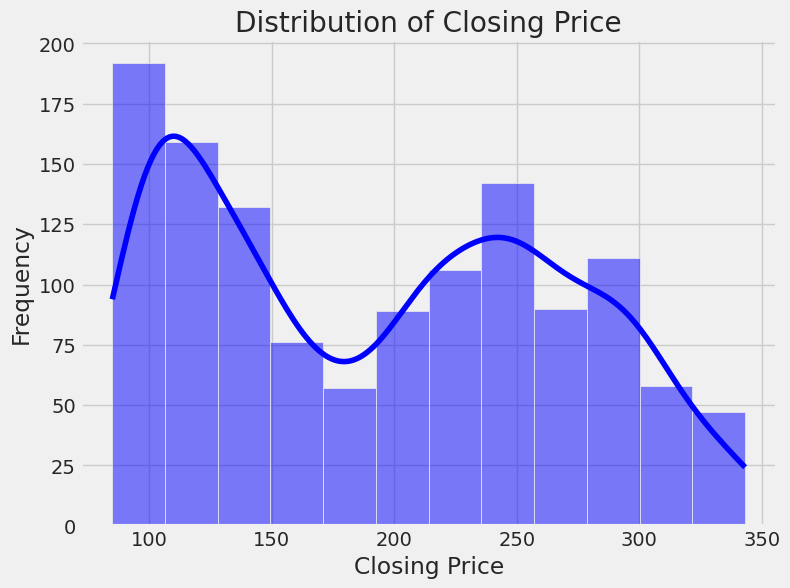

In [ ]:
# Distribution of the closing price
plt.figure(figsize=(8, 6))
sns.histplot(data['Close'], kde=True, color='b')
plt.title('Distribution of Closing Price')
plt.xlabel('Closing Price')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

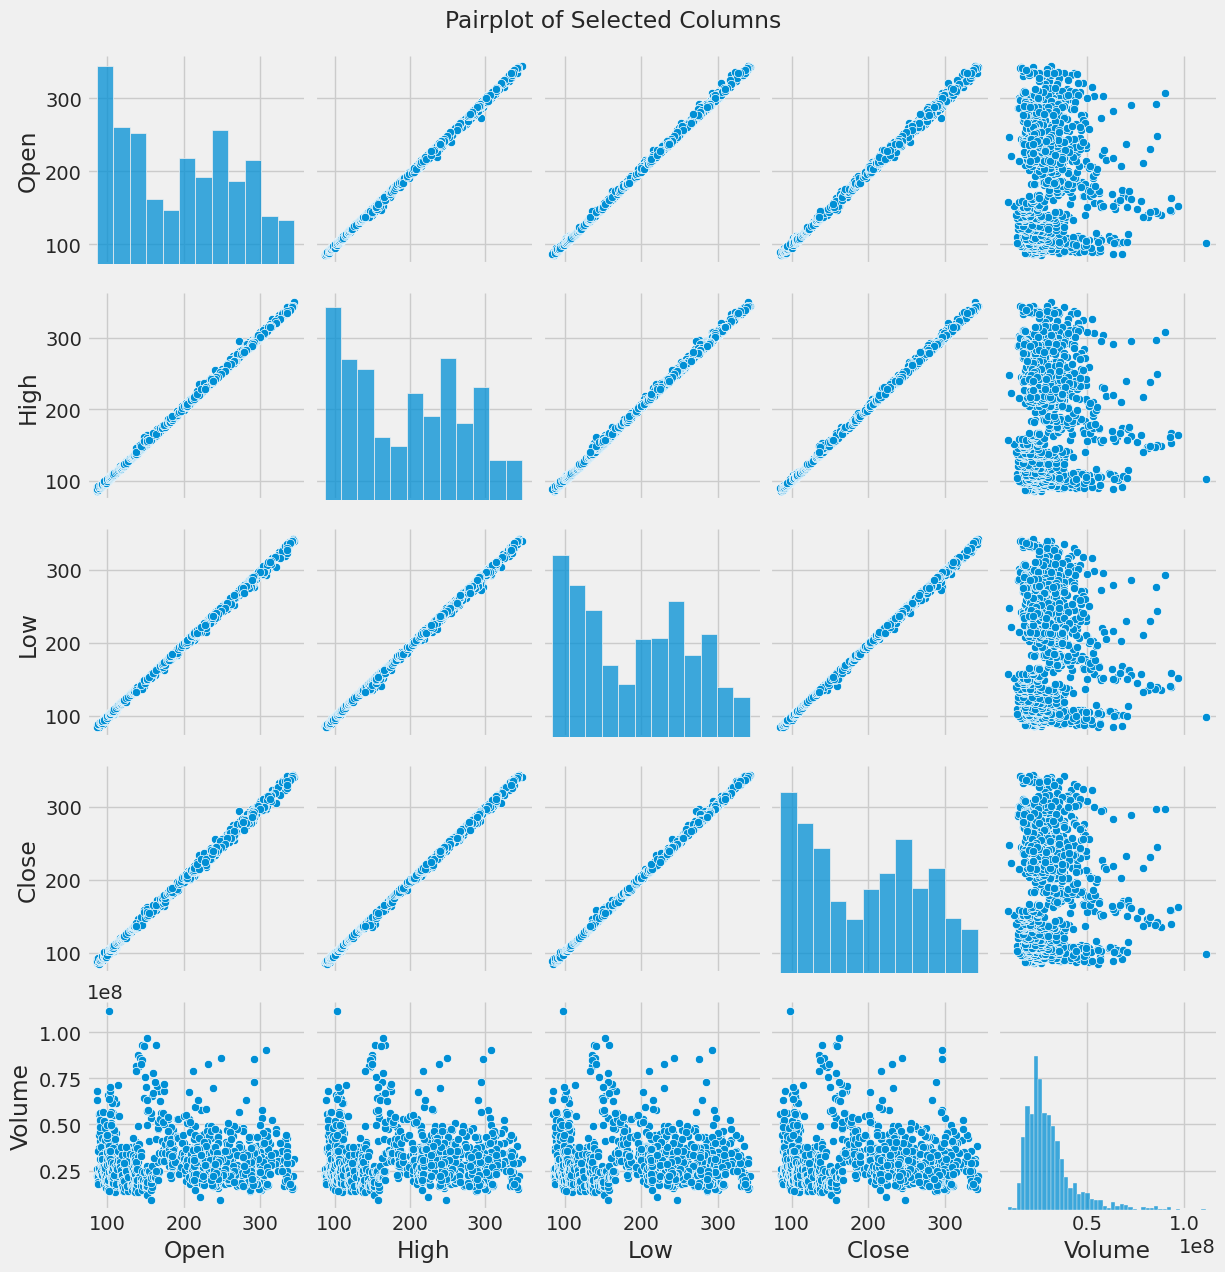

In [ ]:
# Pairplot for selected columns
selected_columns = ['Open', 'High', 'Low', 'Close', 'Volume']
sns.pairplot(data[selected_columns])
plt.suptitle('Pairplot of Selected Columns', y=1.02)
plt.show()

Text(0.5, 1.0, 'Correlation Heatmap')

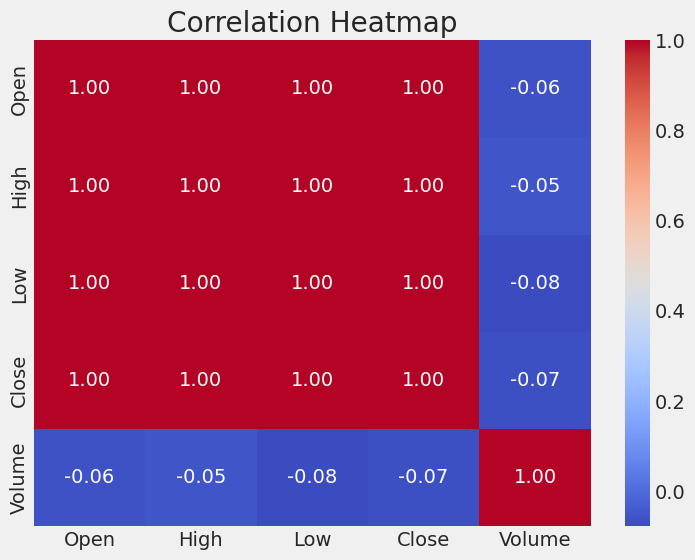

In [ ]:
# Correlation heatmap
correlation_matrix = data[selected_columns].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')

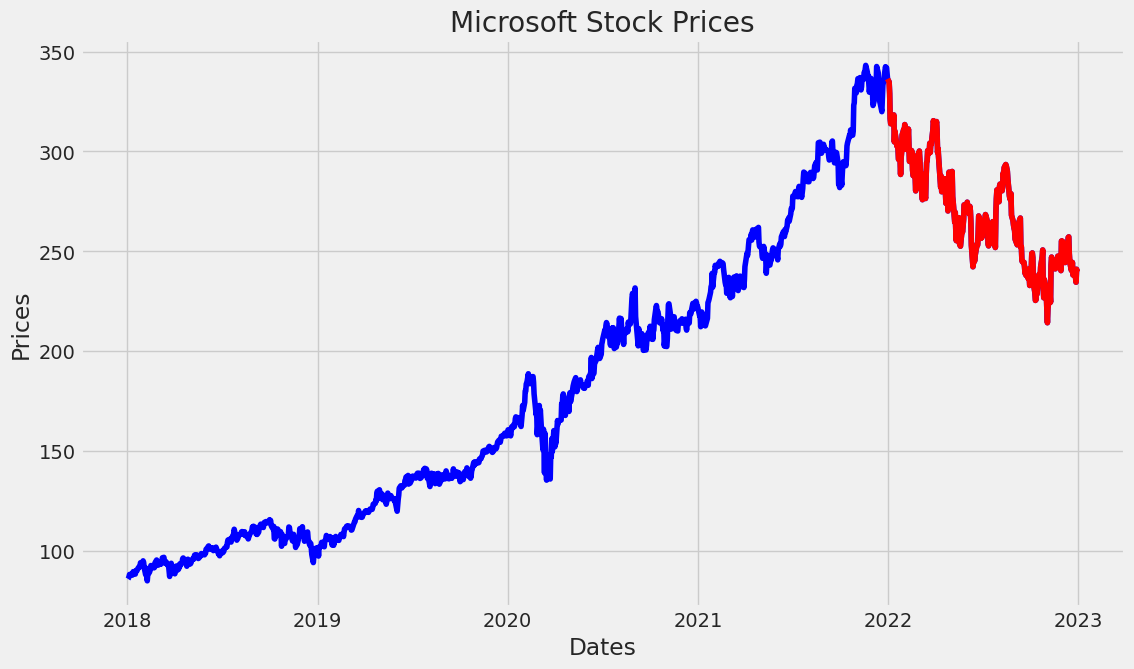

In [ ]:
train_data, test_data = data[0:int(len(data)*0.8)], data[int(len(data)*0.8):]
plt.figure(figsize=(12,7))
plt.title('Microsoft Stock Prices')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.plot(data['Close'], 'blue', label='Training Data')
plt.plot(test_data['Close'], 'red', label='Testing Data')

Stationarity test

In [ ]:
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller

def stationarity(col):
    res = adfuller(col.dropna())
    print("Test Statistic:", res[0])
    print("P-Value:", res[1])
    if res[1] < 0.05:
        print("Stationary")
    else:
        print("Non-Stationary")

In [ ]:
stationarity(data['Close'])

Test Statistic: -1.3093219635176894
P-Value: 0.624896785991395
Non-Stationary


Test Statistic: -11.975767092935117
P-Value: 3.8051651890473555e-22
Stationary


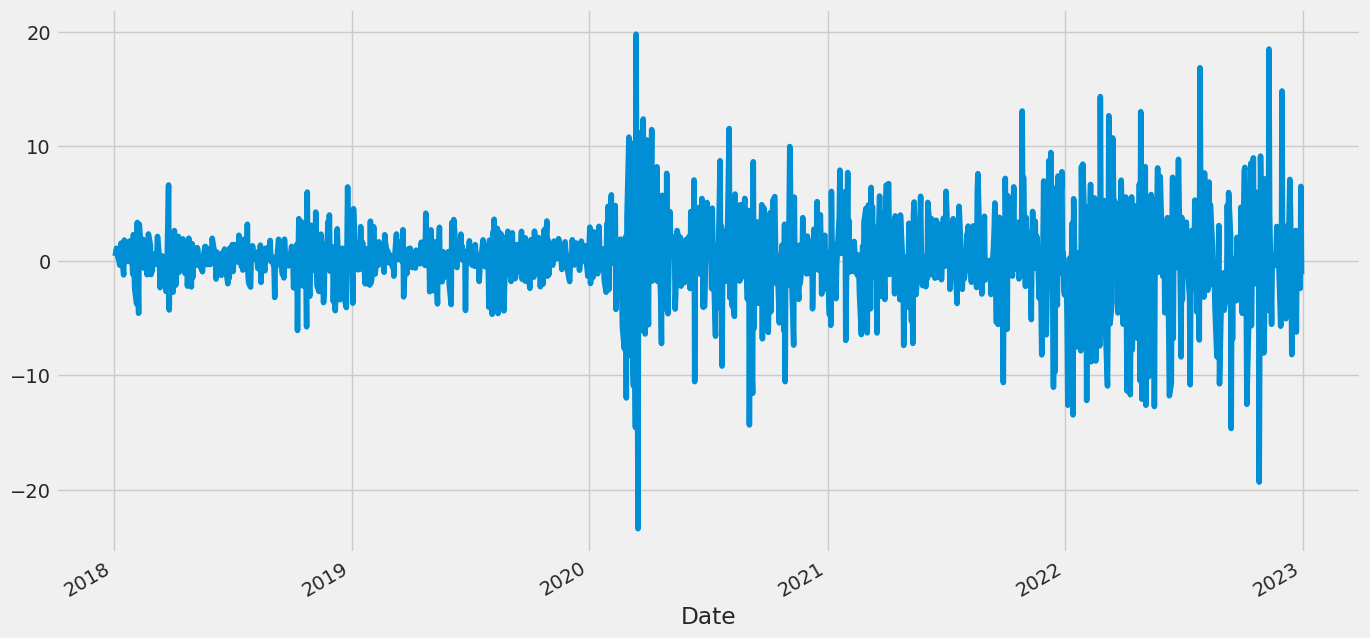

In [ ]:
diff_1_close = data['Close'].diff().dropna()
diff_1_close.plot(figsize=(15,8))

stationarity(diff_1_close)

In [ ]:
!pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 11.9 MB/s eta 0:00:00


In [ ]:
from statsmodels.tsa.stattools import acf, pacf
from pmdarima import auto_arima
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [ ]:
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf

def pacf(col):
    fig, (ax1,ax2) = plt.subplots(1,2, figsize=(15,5))
    ax1.plot(col)
    ax1.set_title('The Column Diff')
    plot_pacf(col, method='ywm', ax=ax2);


def acf(col):
    fig, (ax1,ax2) = plt.subplots(1,2, figsize=(15,5))
    ax1.plot(col)
    ax1.set_title('The Column Diff')
    plot_acf(col, ax=ax2);

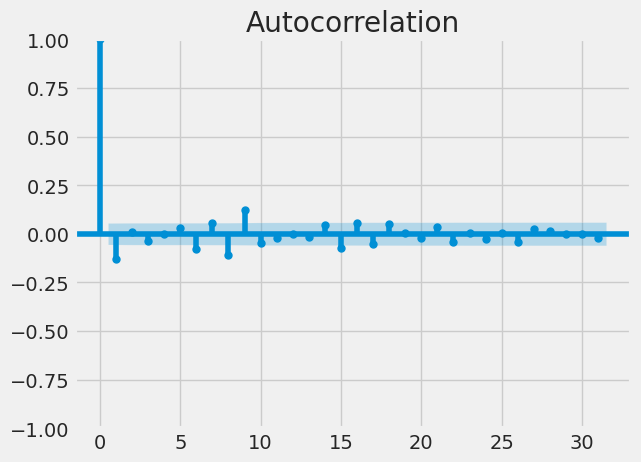

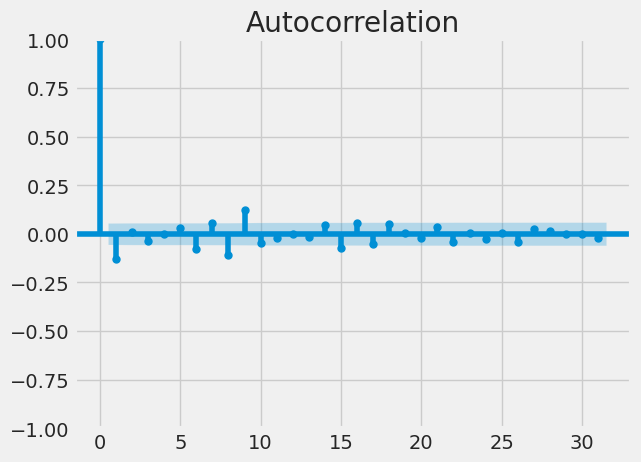

In [ ]:
plot_acf(data['Close'].diff().dropna())

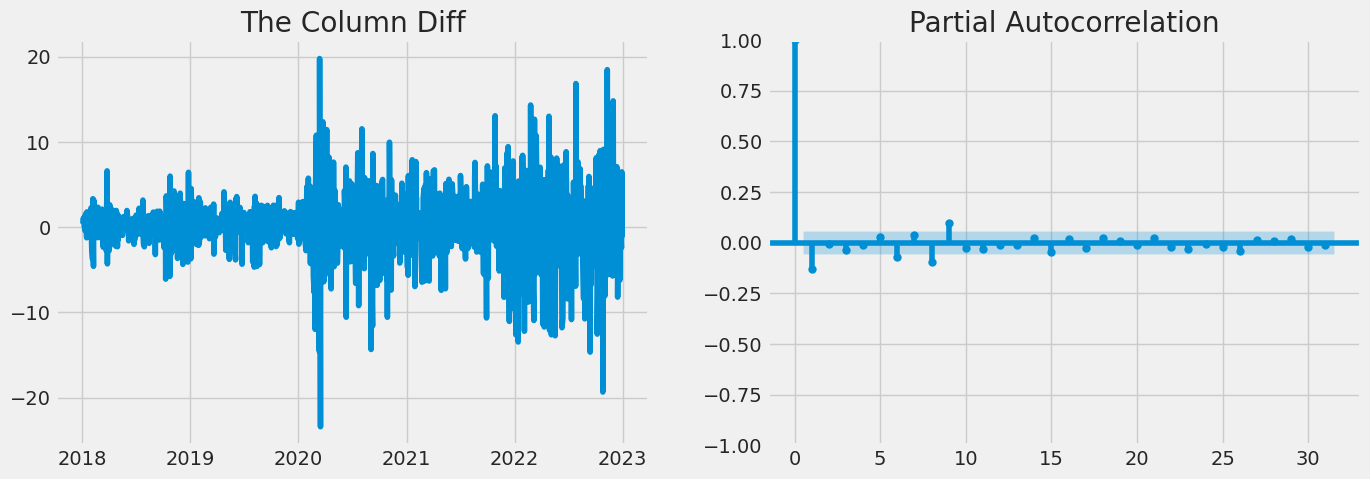

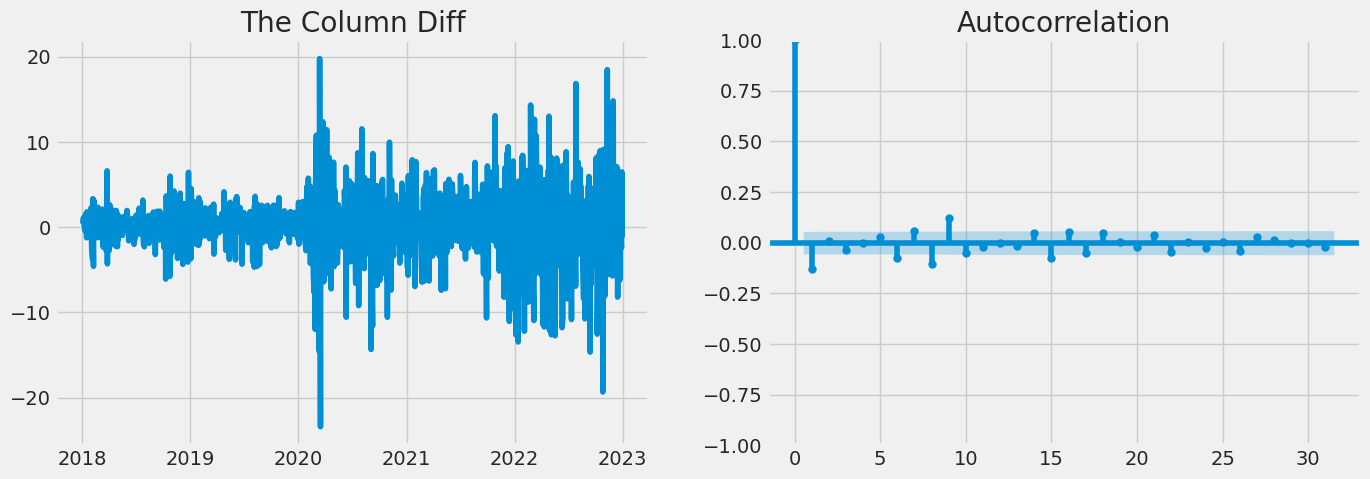

In [ ]:
pacf(diff_1_close)
acf(diff_1_close)

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error


def arima_train_and_plot(data, col_name, Ntest, p, d, q):
    #split data to train and test sets based on N_test value
    train = data.iloc[:-Ntest]
    test = data.iloc[-Ntest:]
    train_idx = data.index <= train.index[-1]
    test_idx = data.index > train.index[-1]

    #Define and fit the arima model
    arima = ARIMA(train[col_name], order=(p,d,q))
    arima_res = arima.fit()

    #plot the real values of stock prices
    fig, ax= plt.subplots(figsize=(15,8))
    ax.plot(data[col_name], label='Actual return')

    #plot the fitted values of model (in sample data predicted values)
    train_pred = arima_res.fittedvalues
    ax.plot(train.index, train_pred, color='green', label='fitted')

    #plot the forecast values of model (out of sample data predicted values)
    prediction_res = arima_res.get_forecast(Ntest)
    conf_int = prediction_res.conf_int()
    #lower and upper limits of prediction
    lower, upper = conf_int[conf_int.columns[0]], conf_int[conf_int.columns[1]]
    forecast = prediction_res.predicted_mean
    ax.plot(test.index, forecast, label='forecast')
    ax.fill_between(test.index, lower, upper, color='red', alpha=0.3)
    ax.legend()

    #evaluating the model using RMSE and MAE metrics
    y_true = test[col_name].values
    rmse = np.sqrt(mean_squared_error(y_true,forecast))
    mae = mean_absolute_error(y_true,forecast)

    return rmse, mae

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/u

Root Mean Squared Error:  70.41568973147326
Mean Absolute Error:  66.23032075121739


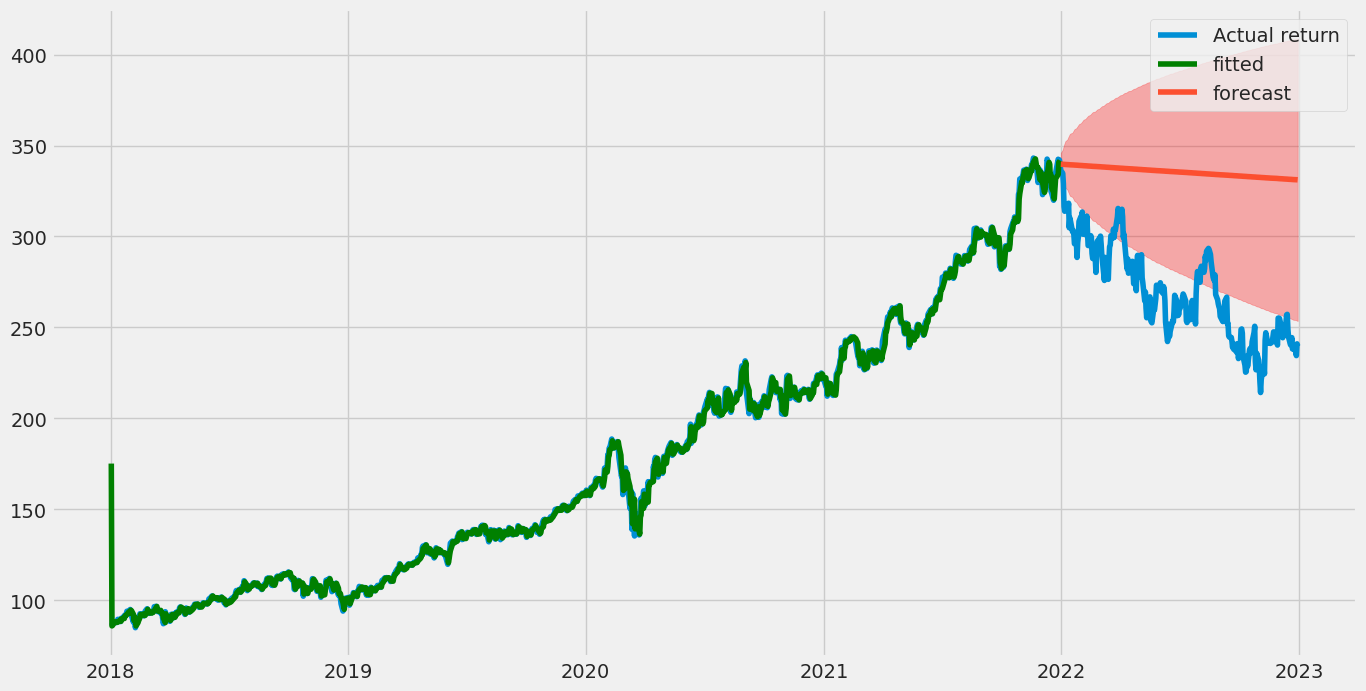

In [ ]:
rmse, mae = arima_train_and_plot(data, 'Close', Ntest=252, p=1, d=0, q=1)
print('Root Mean Squared Error: ', rmse)
print('Mean Absolute Error: ', mae)

Auto ARIMA

In [ ]:
import pmdarima as pm
from pmdarima.arima.utils import ndiffs

d_val = ndiffs(data['Close'], test='adf')
print('Arima D-value:', d_val)

Arima D-value: 1


In [ ]:
Ntest = 252
train = data.iloc[:-Ntest]
test = data.iloc[-Ntest:]
train_idx = data.index <= train.index[-1]
test_idx = data.index > train.index[-1]

#Define auto-arima to find best model
model = pm.auto_arima(train['Close'],
                      d = d_val,
                      start_p = 0,
                      max_p = 10,
                      start_q = 0,
                      max_q = 10,
                      stepwise=False,
                      max_order=252,
                      trace=True)

 ARIMA(0,1,0)(0,0,0)[1] intercept   : AIC=5217.222, Time=0.14 sec
 ARIMA(0,1,1)(0,0,0)[1] intercept   : AIC=5172.984, Time=0.51 sec
 ARIMA(0,1,2)(0,0,0)[1] intercept   : AIC=5170.019, Time=0.96 sec
 ARIMA(0,1,3)(0,0,0)[1] intercept   : AIC=5171.908, Time=1.42 sec
 ARIMA(0,1,4)(0,0,0)[1] intercept   : AIC=5171.965, Time=1.50 sec
 ARIMA(0,1,5)(0,0,0)[1] intercept   : AIC=5172.826, Time=1.55 sec
 ARIMA(0,1,6)(0,0,0)[1] intercept   : AIC=5173.028, Time=1.42 sec
 ARIMA(0,1,7)(0,0,0)[1] intercept   : AIC=5170.002, Time=1.77 sec
 ARIMA(0,1,8)(0,0,0)[1] intercept   : AIC=5168.407, Time=2.07 sec
 ARIMA(0,1,9)(0,0,0)[1] intercept   : AIC=5160.814, Time=2.01 sec
 ARIMA(0,1,10)(0,0,0)[1] intercept   : AIC=5161.339, Time=1.87 sec
 ARIMA(1,1,0)(0,0,0)[1] intercept   : AIC=5168.805, Time=0.18 sec
 ARIMA(1,1,1)(0,0,0)[1] intercept   : AIC=5170.485, Time=0.47 sec
 ARIMA(1,1,2)(0,0,0)[1] intercept   : AIC=5171.967, Time=1.23 sec
 ARIMA(1,1,3)(0,0,0)[1] intercept   : AIC=5168.938, Time=4.20 sec
 ARIMA(1,

In [ ]:
model.get_params()

{'maxiter': 50,
 'method': 'lbfgs',
 'order': (4, 1, 10),
 'out_of_sample_size': 0,
 'scoring': 'mse',
 'scoring_args': {},
 'seasonal_order': (0, 0, 0, 1),
 'start_params': None,
 'suppress_warnings': True,
 'trend': None,
 'with_intercept': True}

In [ ]:
def plot_result(model, data, col_name, Ntest):

    params = model.get_params()
    d = params['order'][1]

    #In sample data prediction
    train_pred = model.predict_in_sample(start=d, end=-1)
    #out of sample prediction
    test_pred, conf = model.predict(n_periods=Ntest, return_conf_int=True)

    #plotting real values, fitted values and prediction values
    fig, ax= plt.subplots(figsize=(15,8))
    ax.plot(data[col_name].index, data[col_name], label='Actual Values')
    ax.plot(train.index[d:], train_pred, color='green', label='Fitted Values')
    ax.plot(test.index, test_pred, label='Forecast Values')
    ax.fill_between(test.index, conf[:,0], conf[:,1], color='red', alpha=0.3)
    ax.legend()

    #evaluating the model using RMSE and MAE metrics
    y_true = test[col_name].values
    rmse = np.sqrt(mean_squared_error(y_true,test_pred))
    mae = mean_absolute_error(y_true,test_pred)

    return rmse, mae

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


Root Mean Squared Error:  111.95711782389203
Mean Absolute Error:  103.46137766384068


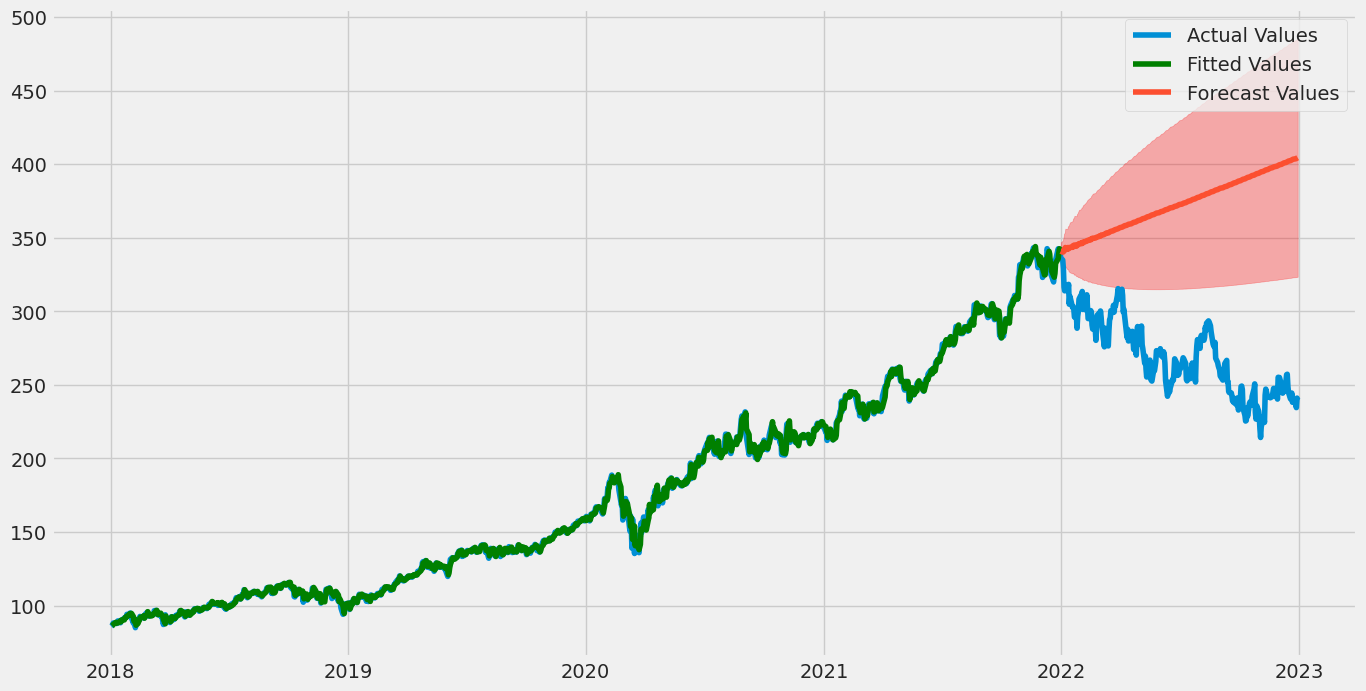

In [ ]:
rmse , mae = plot_result(model, data, 'Close', Ntest=252)
print('Root Mean Squared Error: ', rmse)
print('Mean Absolute Error: ', mae)

SARIMAX

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import acf, pacf
from sklearn.metrics import mean_absolute_error, mean_squared_error

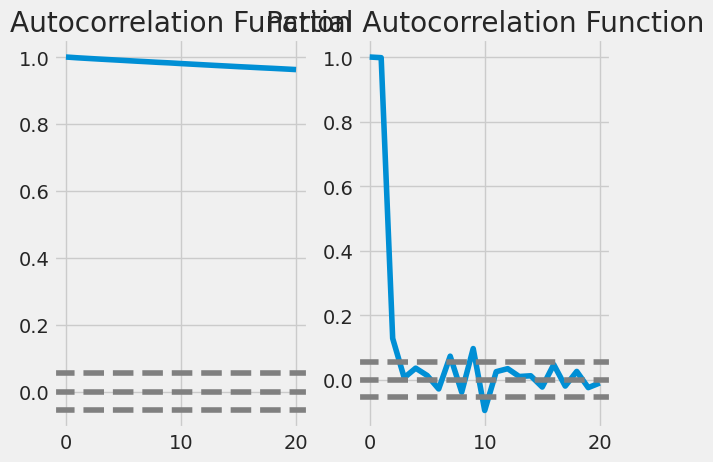

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'


Mean Absolute Error (MAE): 67.82293948392284
Root Mean Square Error (RMSE): 72.18516240337931


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [ ]:
# Function to plot autocorrelation and partial autocorrelation graphs
def plot_acf_pacf(series):
    lag_acf = acf(series, nlags=20)
    lag_pacf = pacf(series, nlags=20, method='ols')

    # Plot ACF
    plt.subplot(121)
    plt.plot(lag_acf)
    plt.axhline(y=0, linestyle='--', color='gray')
    plt.axhline(y=-1.96/np.sqrt(len(series)), linestyle='--', color='gray')
    plt.axhline(y=1.96/np.sqrt(len(series)), linestyle='--', color='gray')
    plt.title('Autocorrelation Function')

    # Plot PACF
    plt.subplot(122)
    plt.plot(lag_pacf)
    plt.axhline(y=0, linestyle='--', color='gray')
    plt.axhline(y=-1.96/np.sqrt(len(series)), linestyle='--', color='gray')
    plt.axhline(y=1.96/np.sqrt(len(series)), linestyle='--', color='gray')
    plt.title('Partial Autocorrelation Function')

    plt.show()

# Plot autocorrelation and partial autocorrelation graphs
plot_acf_pacf(data['Close'])

# Find the optimal SARIMAX model parameters
# You may need to adjust the parameters based on the ACF and PACF plots
order = (1, 0, 1)  # (p, d, q)
seasonal_order = (1, 0, 1, 12)  # (P, D, Q, s)

# Split the data into training and testing sets
train_size = int(len(data) * 0.8)
train, test = data['Close'][:train_size], data['Close'][train_size:]

# Fit the SARIMAX model with the optimal parameters on the training data
sarimax_model = SARIMAX(train, order=order, seasonal_order=seasonal_order)
sarimax_result = sarimax_model.fit(disp=False)

# Make predictions on the test set
predictions = sarimax_result.get_forecast(steps=len(test))
predicted_values = predictions.predicted_mean

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(test, predicted_values)
print(f'Mean Absolute Error (MAE): {mae}')

# Calculate Root Mean Square Error (RMSE)
rmse = np.sqrt(mean_squared_error(test, predicted_values))
print(f'Root Mean Square Error (RMSE): {rmse}')



<ipython-input-52-d0c7261a6978>:2: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "green" (-> color=(0.0, 0.5019607843137255, 0.0, 1.0)). The keyword argument will take precedence.
  plt.plot(train, 'green', color='blue', label='Training Data')


Text(0, 0.5, 'Prices')

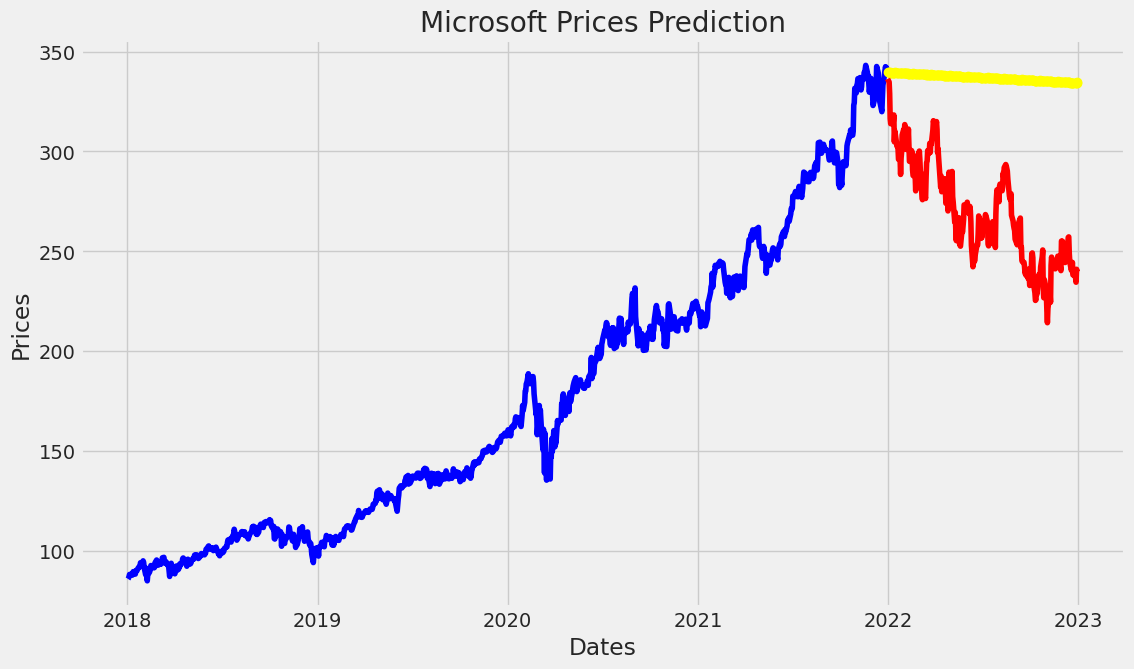

In [ ]:
plt.figure(figsize=(12,7))
plt.plot(train, 'green', color='blue', label='Training Data')
plt.plot(test.index, predicted_values, color='yellow', marker='o', linestyle='dashed',
         label='Predicted Price')
plt.plot(test.index, test, color='red', label='Actual Price')
plt.title('Microsoft Prices Prediction')
plt.xlabel('Dates')
plt.ylabel('Prices')

Random Forest

In [ ]:
import warnings
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
warnings.filterwarnings("ignore")

In [ ]:
#define the feature columns and target column
features = ['Open', 'High', 'Low', 'Adj Close', 'Volume']
target = 'Close'

In [ ]:
#train/test split
x=data[features]
y=data[target]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
data.tail(252)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-12-31,338.510010,339.359985,335.850006,336.320007,330.269440,18000800
2022-01-03,335.350006,338.000000,329.779999,334.750000,328.727631,28865100
2022-01-04,334.829987,335.200012,326.119995,329.010010,323.090942,32674300
2022-01-05,325.859985,326.070007,315.980011,316.380005,310.688202,40054300
2022-01-06,313.149994,318.700012,311.489990,313.880005,308.233093,39646100
...,...,...,...,...,...,...
2022-12-23,236.110001,238.869995,233.940002,238.729996,236.631805,21207000
2022-12-27,238.699997,238.929993,235.830002,236.960007,234.877380,16688600
2022-12-28,236.889999,239.720001,234.169998,234.529999,232.468719,17457100


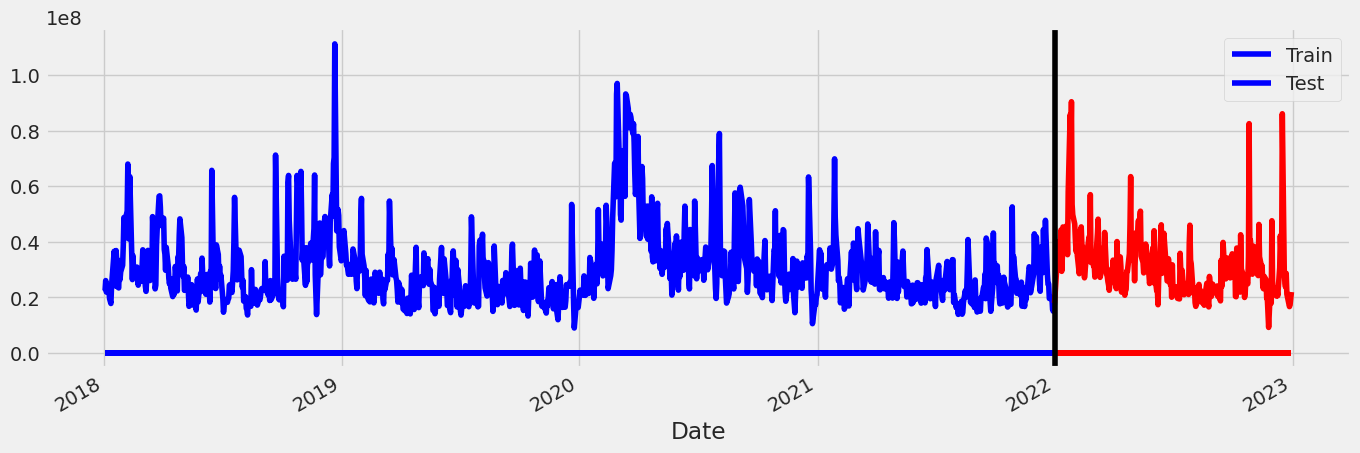

In [ ]:
#train/test data plotting
train=data.loc[data.index<'01-01-2022']
test=data.loc[data.index>='31-12-2021']

fig,ax=plt.subplots(figsize=(15,5))
train.plot(ax = ax, label='Training Set', color = 'blue')
test.plot(ax = ax, label='Test Set', color = 'red')
ax.axvline('01-01-2022',color='black')
ax.legend(['Train','Test'])

plt.show()

In [ ]:
# create Random Forest Regressor object
rf = RandomForestRegressor(n_estimators=100, max_depth=5, min_samples_split=2, min_samples_leaf=1, max_features='sqrt', bootstrap=True)

In [ ]:
# Fitting RF Regression to the Training set
rf.fit(x_train, y_train)

RandomForestRegressor(max_depth=5, max_features='sqrt')

In [ ]:
# Predicting the Test set results
y_pred = rf.predict(x_test)

In [ ]:
#evaluate model's performance on train data
predict = rf.predict(x_train)
r2 = r2_score(y_train, predict)
mse = mean_squared_error(y_train, predict)
rmse = mean_squared_error(y_train, predict, squared=False)
mae = mean_absolute_error(y_train, predict)
print("R2 Score:", r2)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("Mean Absolute Error:", mae)

R2 Score: 0.9996714759069457
Mean Squared Error: 1.8262944605755258
Root Mean Squared Error: 1.3514046250385285
Mean Absolute Error: 1.00195717854436


In [ ]:
#evaluate model's performance on test data
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)
print("R2 Score:", r2)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("Mean Absolute Error:", mae)

R2 Score: 0.999476550537314
Mean Squared Error: 2.9126109041508865
Root Mean Squared Error: 1.706637308906285
Mean Absolute Error: 1.2153261294437672


In [ ]:
#Predict close price on test OHL(open, high, low)
#predictions for data
test_ohl=test[features]
y_pred = rf.predict(test_ohl)

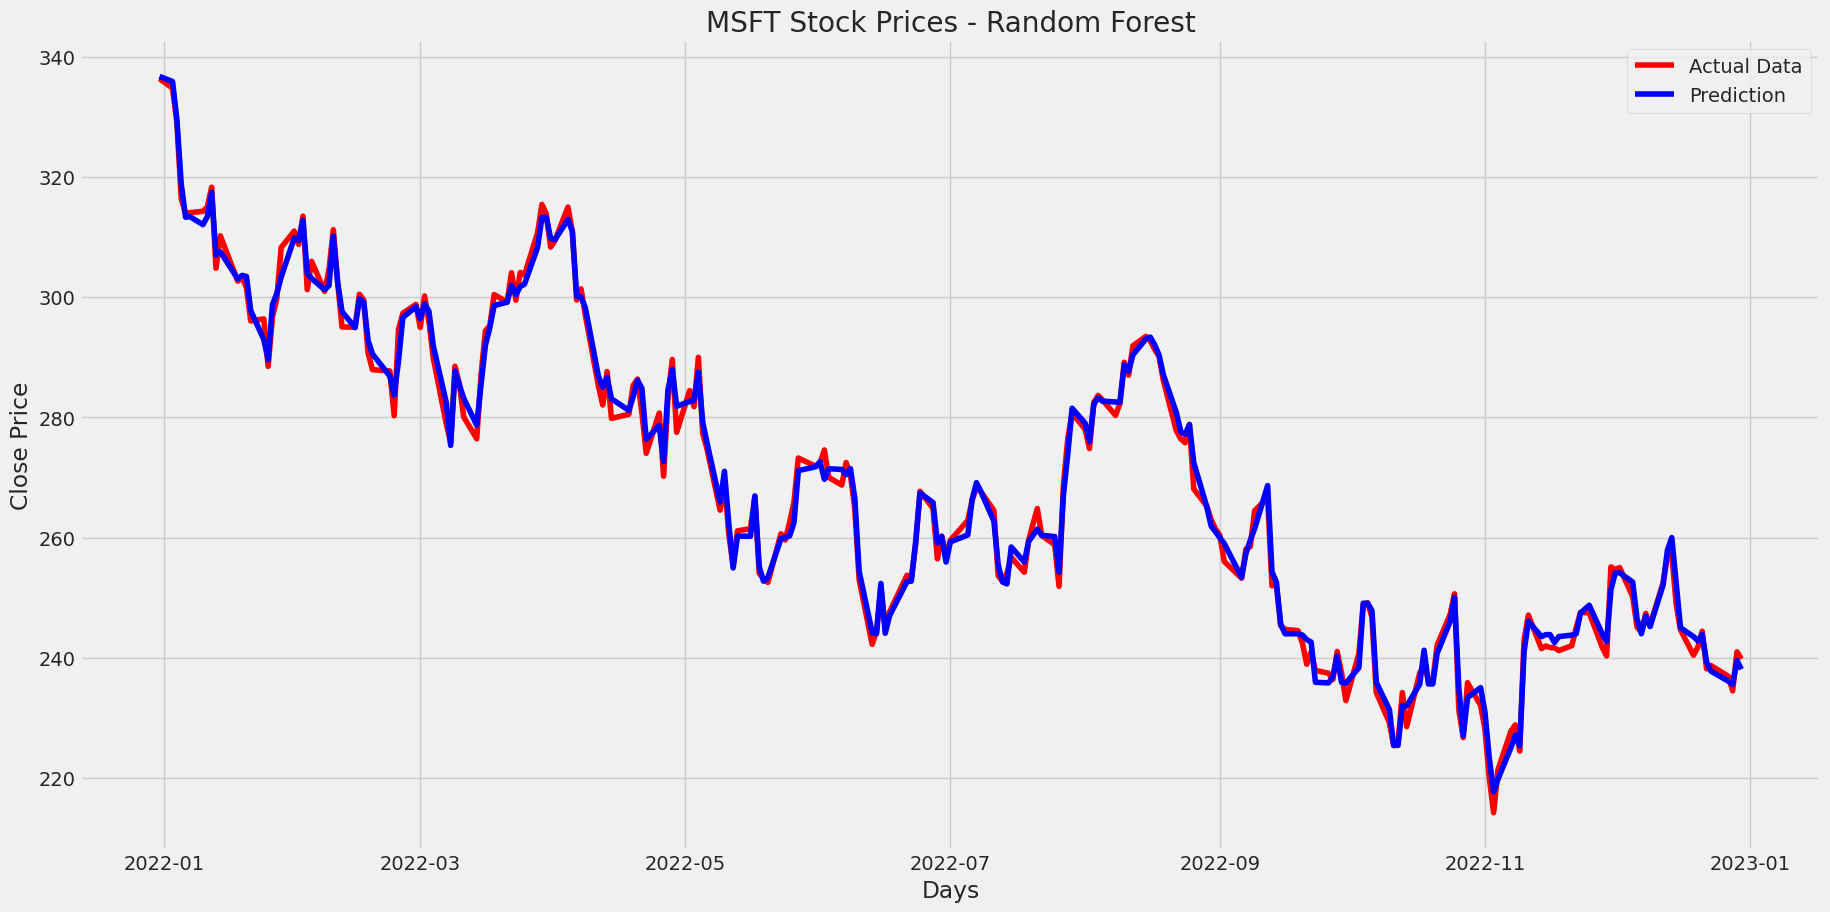

In [ ]:
#plotting
plt.rcParams["figure.figsize"] = (20,10)

plt.plot(test.index,test[target], color = 'red', label="Actual Data")
plt.plot(test.index,y_pred, color='blue', label="Prediction")

plt.title('MSFT Stock Prices - Random Forest')
plt.xlabel('Days')
plt.ylabel('Close Price')
plt.legend()
plt.show()

XG Boost

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from xgboost import XGBRegressor
import matplotlib.pyplot as plt


In [ ]:
xgboost = XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.1, max_depth=3)
xgboost.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [ ]:
y_pred = xgboost.predict(x_test)

In [ ]:
#evaluate model's performance on train data
predict = xgboost.predict(x_train)
r2 = r2_score(y_train, predict)
mse = mean_squared_error(y_train, predict)
rmse = mean_squared_error(y_train, predict, squared=False)
mae = mean_absolute_error(y_train, predict)
print("R2 Score:", r2)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("Mean Absolute Error:", mae)

R2 Score: 0.9999143781279523
Mean Squared Error: 0.47597955197449393
Root Mean Squared Error: 0.6899127133011059
Mean Absolute Error: 0.4944758258959743


In [ ]:
np.round(y_pred[-10:-1], 2)

array([246.29, 241.07, 241.55, 245.07, 238.45, 238.92, 237.74, 237.45,
       239.24], dtype=float32)

In [ ]:
round(data['Close'].tail(10), 3)

Date
2022-12-16    244.69
2022-12-19    240.45
2022-12-20    241.80
2022-12-21    244.43
2022-12-22    238.19
2022-12-23    238.73
2022-12-27    236.96
2022-12-28    234.53
2022-12-29    241.01
2022-12-30    239.82
Name: Close, dtype: float64

In [ ]:
#Predict close price on test OHL(open, high, low)
#predictions for data
test_ohl=test[features]
y_pred = xgboost.predict(test_ohl)

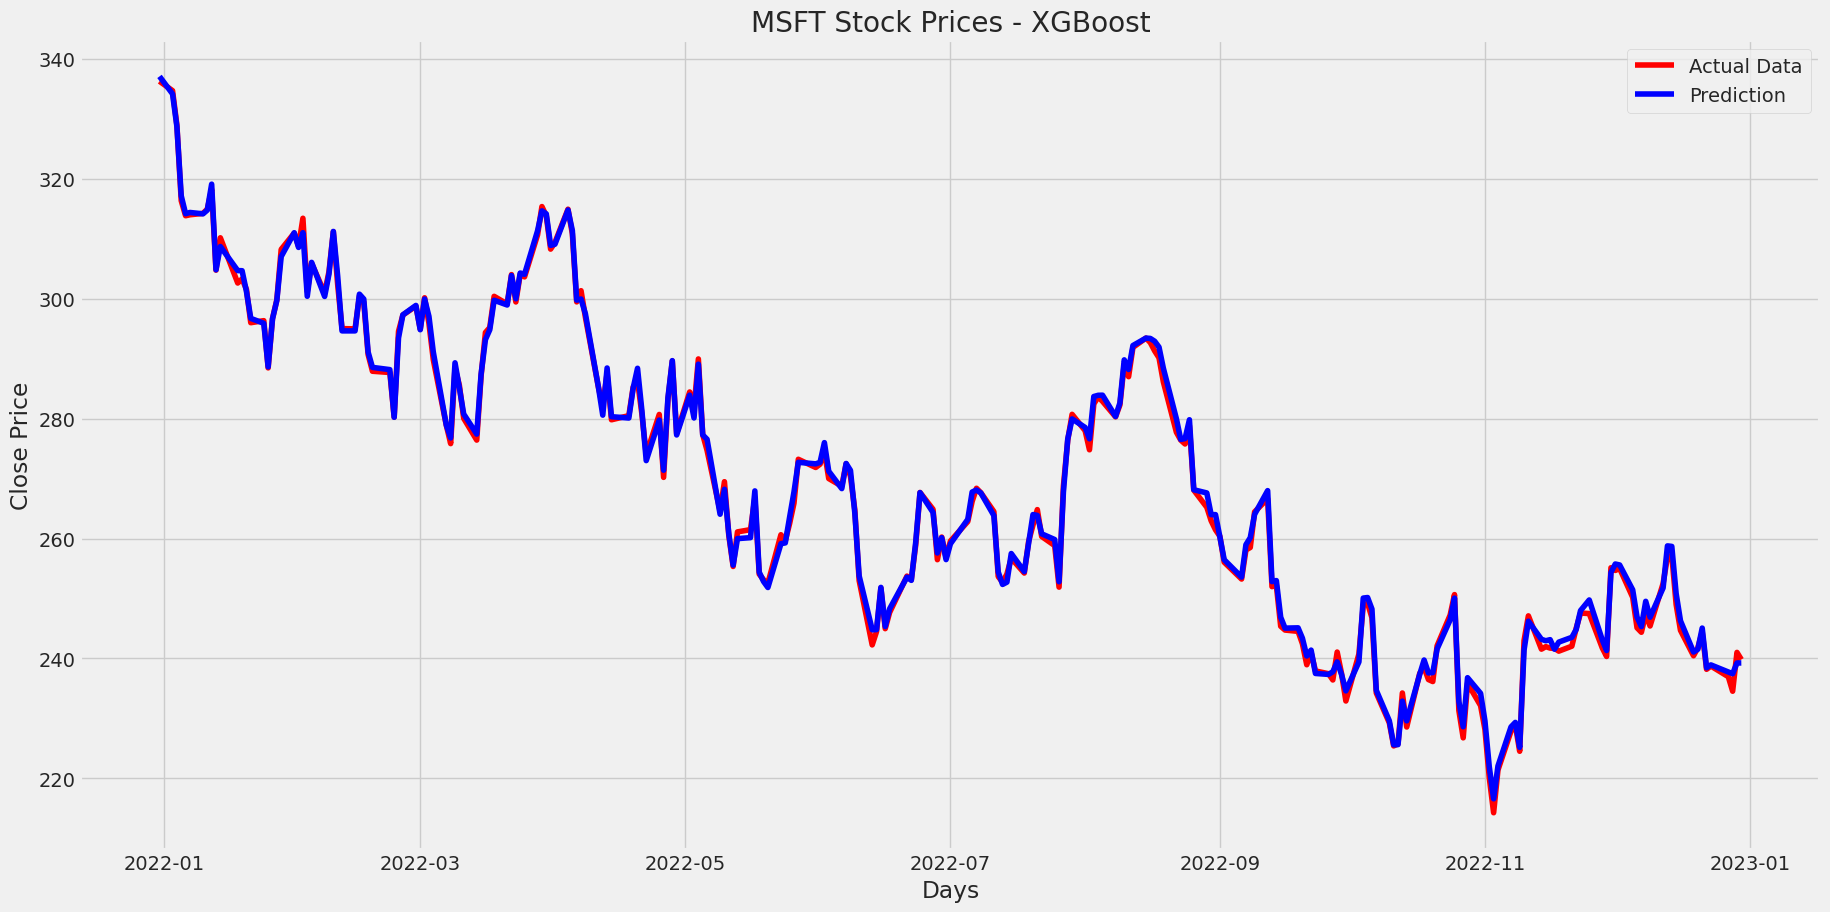

In [ ]:
#plotting
plt.rcParams["figure.figsize"] = (20,10)

plt.plot(test.index,test[target], color = 'red', label="Actual Data")
plt.plot(test.index,y_pred, color='blue', label="Prediction")

plt.title('MSFT Stock Prices - XGBoost')
plt.xlabel('Days')
plt.ylabel('Close Price')
plt.legend()
plt.show()

LSTM

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

Epoch 1/50
995/995 - 11s - loss: 0.0030 - 11s/epoch - 11ms/step
Epoch 2/50
995/995 - 4s - loss: 6.3710e-04 - 4s/epoch - 4ms/step
Epoch 3/50
995/995 - 5s - loss: 5.3065e-04 - 5s/epoch - 5ms/step
Epoch 4/50
995/995 - 4s - loss: 5.6337e-04 - 4s/epoch - 4ms/step
Epoch 5/50
995/995 - 4s - loss: 3.6726e-04 - 4s/epoch - 4ms/step
Epoch 6/50
995/995 - 5s - loss: 3.8287e-04 - 5s/epoch - 5ms/step
Epoch 7/50
995/995 - 4s - loss: 3.3047e-04 - 4s/epoch - 4ms/step
Epoch 8/50
995/995 - 4s - loss: 2.8934e-04 - 4s/epoch - 4ms/step
Epoch 9/50
995/995 - 5s - loss: 2.7518e-04 - 5s/epoch - 5ms/step
Epoch 10/50
995/995 - 4s - loss: 2.4317e-04 - 4s/epoch - 4ms/step
Epoch 11/50
995/995 - 4s - loss: 2.5964e-04 - 4s/epoch - 4ms/step
Epoch 12/50
995/995 - 5s - loss: 2.5937e-04 - 5s/epoch - 5ms/step
Epoch 13/50
995/995 - 4s - loss: 2.5799e-04 - 4s/epoch - 4ms/step
Epoch 14/50
995/995 - 4s - loss: 2.3175e-04 - 4s/epoch - 4ms/step
Epoch 15/50
995/995 - 5s - loss: 2.2649e-04 - 5s/epoch - 5ms/step
Epoch 16/50
995/995 

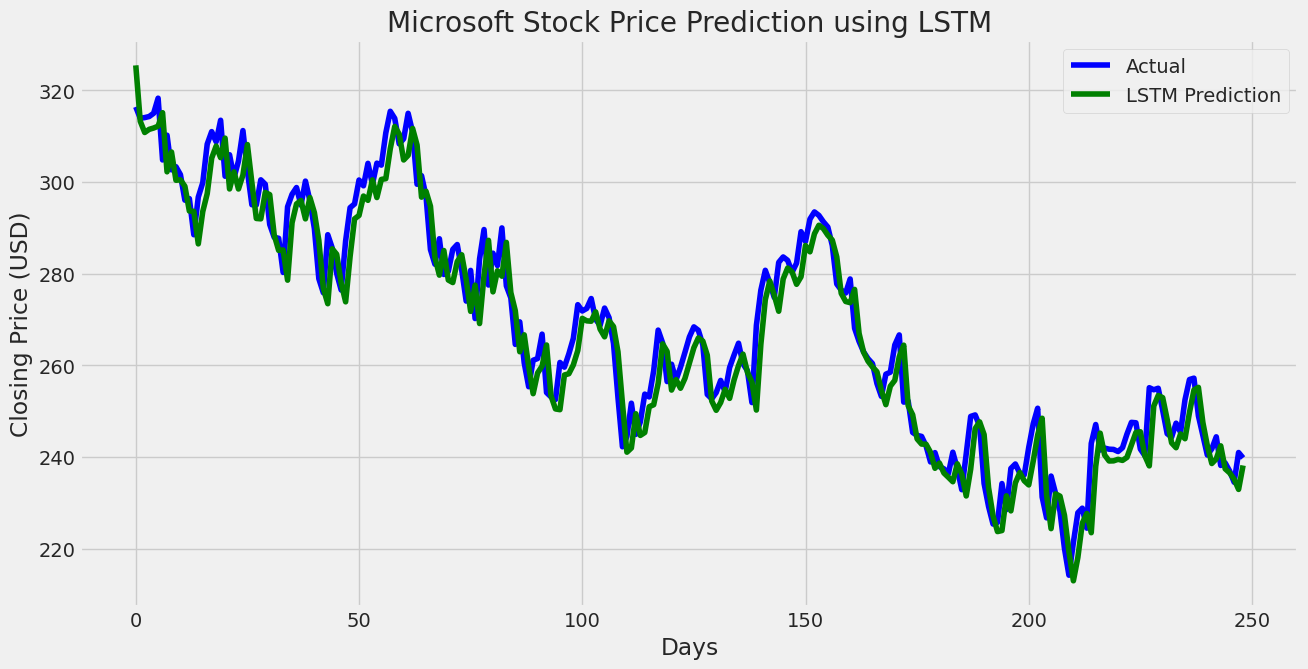

In [ ]:


# Use the closing prices for prediction
data = data[['Close']]
data['Date'] = data.index

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(data['Close'].values.reshape(-1, 1))

# Function to create time series data
def create_time_series_data(data, look_back=1):
    X, y = [], []
    for i in range(len(data)-look_back):
        X.append(data[i:(i+look_back), 0])
        y.append(data[i+look_back, 0])
    return np.array(X), np.array(y)

# Create time series data with a look back of 10 days
look_back = 15
X_lstm, y_lstm = create_time_series_data(data_scaled, look_back)

# Split the data into training and testing sets
train_size = int(len(X_lstm) * 0.8)
X_train_lstm, X_test_lstm = X_lstm[:train_size], X_lstm[train_size:]
y_train_lstm, y_test_lstm = y_lstm[:train_size], y_lstm[train_size:]

# Reshape the data for LSTM input (samples, time steps, features)
X_train_lstm = np.reshape(X_train_lstm, (X_train_lstm.shape[0], X_train_lstm.shape[1], 1))
X_test_lstm = np.reshape(X_test_lstm, (X_test_lstm.shape[0], X_test_lstm.shape[1], 1))

# Build the LSTM model
model_lstm = Sequential()
model_lstm.add(LSTM(50, input_shape=(look_back, 1)))
model_lstm.add(Dense(1))
model_lstm.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model_lstm.fit(X_train_lstm, y_train_lstm, epochs=50, batch_size=1, verbose=2)

# Make predictions on the test set
y_pred_lstm_scaled = model_lstm.predict(X_test_lstm)
y_pred_lstm = scaler.inverse_transform(y_pred_lstm_scaled)

# Inverse transform the actual values for evaluation
y_test_lstm_orig = scaler.inverse_transform(y_test_lstm.reshape(-1, 1))

# Evaluate the model using RMSE and MAE
rmse_lstm = np.sqrt(mean_squared_error(y_test_lstm_orig, y_pred_lstm))
mae_lstm = mean_absolute_error(y_test_lstm_orig, y_pred_lstm)

print(f'Root Mean Squared Error (RMSE) - LSTM: {rmse_lstm}')
print(f'Mean Absolute Error (MAE) - LSTM: {mae_lstm}')

# Plotting the actual vs predicted values on the test set
plt.figure(figsize=(14, 7))
plt.plot(y_test_lstm_orig, label='Actual', color='blue')
plt.plot(y_pred_lstm, label='LSTM Prediction', color='red')
plt.title('Microsoft Stock Price Prediction using LSTM')
plt.xlabel('Days')
plt.ylabel('Closing Price (USD)')
plt.legend()
plt.show()

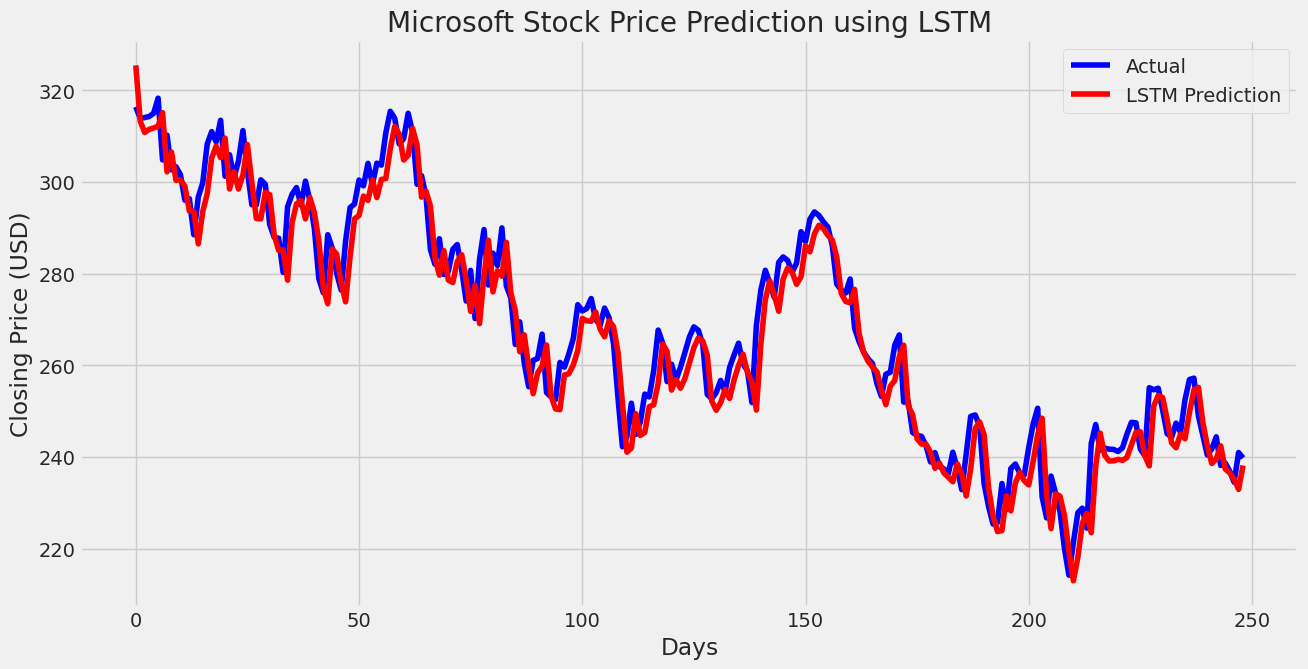

In [ ]:
# Plotting the actual vs predicted values on the test set
plt.figure(figsize=(14, 7))
plt.plot(y_test_lstm_orig, label='Actual', color='blue')
plt.plot(y_pred_lstm, label='LSTM Prediction', color='red')
plt.title('Microsoft Stock Price Prediction using LSTM')
plt.xlabel('Days')
plt.ylabel('Closing Price (USD)')
plt.legend()
plt.show()